<a href="https://colab.research.google.com/github/Harsha-b7/test/blob/master/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
data=pd.read_csv("/content/Amazon Review Data Web Scrapping - Amazon Review Data Web Scrapping.csv",encoding='unicode_escape')

In [ ]:
data.head()

,Unique_ID,Category,Review_Header,Review_text,Rating,Own_Rating
0,136040,smartTv,Nice one,I liked it,5,Positive
1,134236,mobile,Huge battery life with amazing display,I bought the phone on Amazon and been using my...,5,Positive
2,113945,books,Four Stars,"Awesome book at reasonable price, must buy ......",4,Positive
3,168076,smartTv,Nice quality,good,5,Positive
4,157302,books,Nice book,"The book is fine,not bad,contains nice concept...",3,Neutral


In [ ]:
data.columns

Index(['Unique_ID', 'Category', 'Review_Header', 'Review_text', 'Rating',
       'Own_Rating'],
      dtype='object')

In [ ]:
data.shape

(60889, 6)

In [ ]:
data['Review_text'].shape

(60889,)

In [ ]:
data['Review_text'].value_counts()

Good                                                                                                                                                                                                                            2316
Nice                                                                                                                                                                                                                             707
Good product                                                                                                                                                                                                                     487
Ok                                                                                                                                                                                                                               297
Excellent                                                                           

In [ ]:
print(data.isnull().sum())

Unique_ID         0
Category          0
Review_Header     3
Review_text      28
Rating            0
Own_Rating        0
dtype: int64


In [ ]:
# Drop rows with any null values
data_cleaned = data.dropna()

# Drop columns with any null values
data_cleaned = data.dropna(axis=1)
import pandas as pd

# Assuming 'df' is your DataFrame
# Drop rows with any null values and overwrite the original DataFrame
data.dropna(inplace=True)

# Drop rows where specific columns have null values
df_cleaned = data.dropna(subset=['Review_text'])



In [ ]:
print(data.isnull().sum())

Unique_ID        0
Category         0
Review_Header    0
Review_text      0
Rating           0
Own_Rating       0
dtype: int64


In [ ]:
data_set=pd.DataFrame(data['Review_text'].unique()).rename(columns={0:'Review_text'})
print(data_set.shape)
print(data_set)

(49883, 1)
                                             Review_text
0                                             I liked it
1      I bought the phone on Amazon and been using my...
2      Awesome book at reasonable price, must buy ......
3                                                   good
4      The book is fine,not bad,contains nice concept...
...                                                  ...
49878                                     Nice ....Watch
49879  1) 3.5 mm jack is not supporting any kind of h...
49880  Value for money, using since more than 4 month...
49881         Heating problem. Battery backup less than.
49882  fingerprint reader average Camera quality belo...

[49883 rows x 1 columns]


In [ ]:
print(data_set.columns)

Index(['Review_text'], dtype='object')


In [ ]:
data_set["Review_text"]=data['Review_text'].str.replace("[^a-zA-Z0-9]"," ")

<ipython-input-34-9b1c4c0f5c11>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data_set["Review_text"]=data['Review_text'].str.replace("[^a-zA-Z0-9]"," ")


Removing Short words

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = '/content/Amazon Review Data Web Scrapping - Amazon Review Data Web Scrapping.csv'
df = pd.read_csv(file_path)

# Set a threshold for the minimum length of review_text
threshold_length = 10  # Adjust this threshold as needed

# Filter DataFrame to remove rows with short review_text
df_filtered = df[df['Review_text'].str.len() >= threshold_length]

# Display the updated DataFrame
print(df_filtered)


       Unique_ID            Category                           Review_Header  \
0         136040             smartTv                                Nice one   
1         134236              mobile  Huge battery life with amazing display   
2         113945               books                              Four Stars   
4         157302               books                               Nice book   
5         146539             smartTv                                 Nice tv   
...          ...                 ...                                     ...   
60883     110121  mobile accessories         Not Happy facing so much issues   
60885     162092             smartTv                              Five Stars   
60886     164387              mobile                           Best in prise   
60887     133063             smartTv                           Not gud pbone   
60888     167823              mobile                           Not recommend   

                                       

In [ ]:
#converting into lower case
#data_set["Review_text"]=[rt.lower( ) for rt in data_set['Review_text']]
data_set["Review_text"] = [str(rt).lower() if isinstance(rt, str) else rt for rt in data_set['Review_text']]


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

#considering data-set is our data frame and 'Review_text is the column you want to process
data_set['Review_text']=data_set['Review_text'].apply(lambda x: ' '.join([sent for sent in x.split() if sent.lower() not in stopwords('english')]))

# Removing punctuation as well
data_set['Review_text']=data_set['Review_text'].str.replace(r'[^\w\s]','')

print(data_set)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


TypeError: ignored

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

# Assuming data_set is your DataFrame and 'Review_text' is the column you want to process
data_set['Review_text'] = data_set['Review_text'].apply(lambda x: ' '.join([word for word in str(x).split() if word.lower() not in stopwords.words('english')]))

# Removing punctuation as well
data_set['Review_text'] = data_set['Review_text'].str.replace(r'[^\w\s]', '')

print(data_set)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                             Review_text
0                                                  liked
1      bought phone amazon using samsung m30s couple ...
2                 awesome book reasonable price must buy
3                                                   good
4      book fine bad contains nice concepts nicely ex...
...                                                  ...
49878  pros nice design build quality speaker good ba...
49879                                                 ok
49880  love phone dont even think future samsung m30s...
49881  iam using samsung a8 good plugs tightly carefu...
49882  rating phone 1 star paper specifications reall...

[49883 rows x 1 columns]


<ipython-input-46-afd63f5c4fd6>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  data_set['Review_text'] = data_set['Review_text'].str.replace(r'[^\w\s]', '')


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('wordnet')

# Assuming data_set is your DataFrame and 'Review_text' is the column you want to process
lemmatizer = WordNetLemmatizer()

data_set['Review_text'] = data_set['Review_text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(str(x).lower()) if word.isalpha() and word not in stopwords.words('english')]))

# Removing punctuation as well
data_set['Review_text'] = data_set['Review_text'].str.replace(r'[^\w\s]', '')

print(data_set)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


                                             Review_text
0                                                  liked
1      bought phone amazon using samsung couple week ...
2                 awesome book reasonable price must buy
3                                                   good
4      book fine bad contains nice concept nicely exp...
...                                                  ...
49878  pro nice design build quality speaker good bat...
49879                                                 ok
49880  love phone dont even think future samsung disa...
49881  iam using samsung good plug tightly careful ti...
49882  rating phone star paper specification really g...

[49883 rows x 1 columns]


<ipython-input-47-f2ab6169779a>:15: FutureWarning: The default value of regex will change from True to False in a future version.
  data_set['Review_text'] = data_set['Review_text'].str.replace(r'[^\w\s]', '')


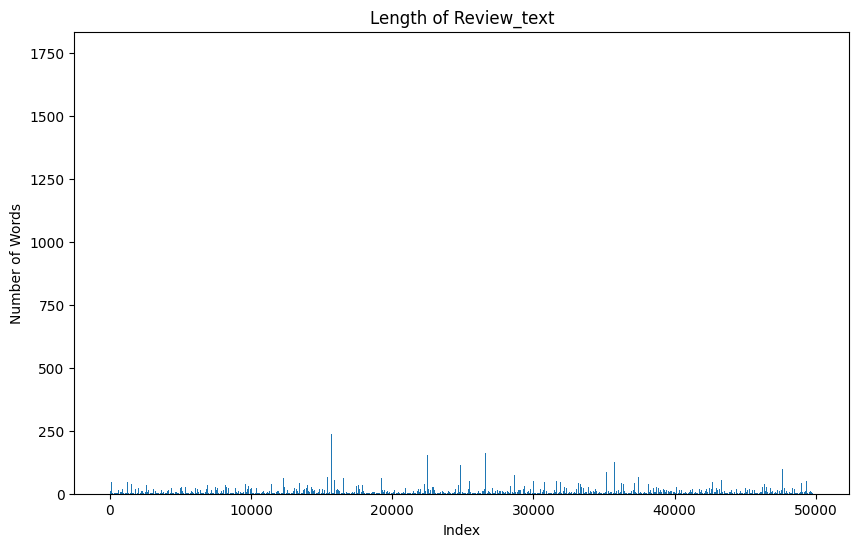

In [ ]:
import matplotlib.pyplot as plt

# Assuming data_set is your DataFrame
review_lengths = data_set['Review_text'].apply(lambda x: len(x.split()))

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(review_lengths.index, review_lengths)
plt.title('Length of Review_text')
plt.xlabel('Index')
plt.ylabel('Number of Words')
plt.show()


Word Cloud

In [ ]:
!pip install wordcloud matplotlib


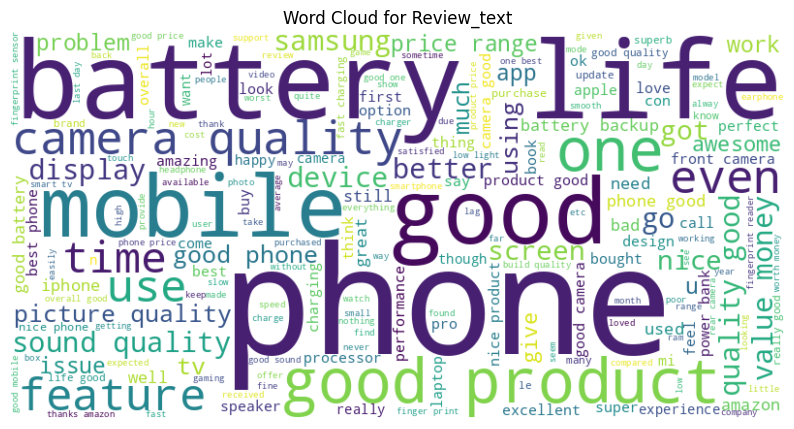

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming data_set is your DataFrame
text = ' '.join(data_set['Review_text'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, random_state=42, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Review_text')
plt.show()


Bag of words model

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Load the CSV file into a DataFrame
file_path = '/content/Amazon Review Data Web Scrapping - Amazon Review Data Web Scrapping.csv'
df = pd.read_csv(file_path)

# Extract the "Review_Text" column from the DataFrame
corpus = df['Review_text'].astype(str).tolist()

# Create an instance of the CountVectorizer class
vectorizer = CountVectorizer()

# Fit and transform the corpus into a Bag of Words matrix
X = vectorizer.fit_transform(corpus)

# Get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Convert the Bag of Words matrix to a dense matrix and display it
dense_matrix = pd.DataFrame(X.toarray(), columns=feature_names)
print("Bag of Words matrix:")
print(dense_matrix)


Bag of Words matrix:
       00  000  0008301163  0009001009009  000above  000mah  001  0026tu  007  \
0       0    0           0              0         0       0    0       0    0   
1       0    0           0              0         0       0    0       0    0   
2       0    0           0              0         0       0    0       0    0   
3       0    0           0              0         0       0    0       0    0   
4       0    0           0              0         0       0    0       0    0   
...    ..  ...         ...            ...       ...     ...  ...     ...  ...   
60884   0    0           0              0         0       0    0       0    0   
60885   0    0           0              0         0       0    0       0    0   
60886   0    0           0              0         0       0    0       0    0   
60887   0    0           0              0         0       0    0       0    0   
60888   0    0           0              0         0       0    0       0    0   

      

Word Embedding Model

In [ ]:
import pandas as pd
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')  # Download the punkt tokenizer if not already installed

# Load the CSV file into a DataFrame
file_path = '/content/Amazon Review Data Web Scrapping - Amazon Review Data Web Scrapping.csv'
df = pd.read_csv(file_path)

# Ensure that the "Review_text" column is treated as strings
df['Review_text'] = df['Review_text'].astype(str)

# Tokenize the review text into words
tokenized_reviews = [word_tokenize(str(review)) for review in df['Review_text']]

# Remove reviews with no tokens
tokenized_reviews = [tokens for tokens in tokenized_reviews if len(tokens) > 0]

# Train Word2Vec model
model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

# Save the Word2Vec model (optional)
model.save("word2vec_model.model")

# Example: Get the word vector for a specific word
word_vector = model.wv['phone']
print("Vector representation for 'example_word':", word_vector)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Vector representation for 'example_word': [ 0.51445067 -0.7061741   0.9116745  -1.6416831  -1.0614425  -0.93868554
  0.37698916  1.0435861   1.8052764  -1.4919996  -2.0122194  -0.43068564
 -0.02495095 -1.0677899   0.00534436 -1.8217546  -2.9088123   0.06289141
 -0.57778347  0.94834304 -0.93358266  0.33398375 -2.8439388   0.5001803
  0.17703708  1.632254   -0.6054538  -1.1115534  -0.20450789  1.2934235
  0.4185572  -1.3472034  -0.07699542 -1.15279    -0.5732955   1.5193275
  0.8143218  -0.00578287  0.0969616   0.16537283  1.4658432   0.38726616
  1.8547951   1.6380805  -0.6189658  -0.6413847   0.30720103 -0.3674523
 -2.6717942   1.2479805   2.2566407  -1.1555748  -0.06274027 -1.8261881
  1.5527897   0.71448344 -1.8496815  -0.7729881  -0.21357043 -0.785743
 -0.19297397 -0.9514683  -0.78459424 -0.49128744  0.8919133  -1.7024952
  1.4028409  -0.19723915  0.17563094 -2.2743688   1.5325931   1.204213
  0.5256759   0.24887903 -0.2936977   1.6901778  -0.3704568  -1.6397346
  1.8785853   2.0425

In [ ]:
import pandas as pd
from textblob import TextBlob


# Ensure that the "Review_Text" column is treated as strings
data_set['Review_text'] = data_set['Review_text'].astype(str)

# Function to perform sentiment analysis using TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(text)
    # Classify the polarity of the text (-1 to 1)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the "Review_Text" column
data_set['Sentiment'] = data_set['Review_text'].apply(analyze_sentiment)

# Display the DataFrame with the added "Sentiment" column
print(data_set[['Review_text', 'Sentiment']])


                                             Review_text Sentiment
0                                                  liked  Positive
1      bought phone amazon using samsung couple week ...  Positive
2                 awesome book reasonable price must buy  Positive
3                                                   good  Positive
4      book fine bad contains nice concept nicely exp...  Positive
...                                                  ...       ...
49878  pro nice design build quality speaker good bat...  Positive
49879                                                 ok  Positive
49880  love phone dont even think future samsung disa...  Positive
49881  iam using samsung good plug tightly careful ti...  Positive
49882  rating phone star paper specification really g...  Positive

[49883 rows x 2 columns]


In [ ]:
!pip install polyglot


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.3/126.3 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for polyglot: filename=polyglot-16.7.4-py2.py3-none-any.whl size=52562 sha256=35dc1027b6b87ef3c049c980e94be69ff22cfb536d709f8a7b3e591645ad53dc
  Stored in directory: /root/.cache/pip/wheels/aa/92/4a/b172589446ba537db3bdb9a1f2204f27fe71217981c14ac368
Successfully built polyglot


In [ ]:
!apt-get -qq install -y libicu-dev
!pip install polyglot


In [ ]:
!pip install langid
!pip install googletrans==4.0.0-rc1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941172 sha256=fa5543e2627db3286a9fa03b509db7fc24abe253019ea798b78973e1114a230a
  Stored in directory: /root/.cache/pip/wheels/23/c8/c6/eed80894918490a175677414d40bd7c851413bbe03d4856c3c
Successfully built langid
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.4 MB/s eta 

Mutiple Language support

In [ ]:
from langid.langid import LanguageIdentifier, model
from googletrans import Translator
import pandas as pd

# Load the CSV file into a DataFrame
file_path = '/content/Amazon Review Data Web Scrapping - Amazon Review Data Web Scrapping.csv'
df = pd.read_csv(file_path)

# Function to detect language and translate to English
def detect_and_translate(text):
    # Detect the language
    lang_identifier = LanguageIdentifier.from_modelstring(model, norm_probs=True)
    detected_lang, _ = lang_identifier.classify(text)

    # Translate to English if the detected language is not English
    if detected_lang != 'en':
        translator = Translator()
        text = translator.translate(text).text

    return text

# Apply the detect_and_translate function to the 'Review_Text' column
data_set['Translated_Review'] = data_set['Review_text'].apply(detect_and_translate)

# Display the DataFrame with the translated text
print(data_set[['Review_text', 'Translated_Review']])


KeyboardInterrupt: ignored

Topic Modelling

LDA Technique

In [ ]:
import pandas as pd
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim import models
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import gensim.downloader as api

# Preprocess the text data
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(str(text))
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return tokens

data_set['tokens'] = data_set['Review_text'].apply(preprocess_text)

# Create a Gensim Dictionary
dictionary = Dictionary(data_set['tokens'])

# Create a Gensim Corpus
corpus = [dictionary.doc2bow(tokens) for tokens in data_set['tokens']]

# Build the LDA model
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print the topics
for topic_id, topic in lda_model.print_topics():
    print(f"Topic {topic_id + 1}: {topic}\n")

# Assign topics to documents
data_set['lda_topic'] = [max(lda_model[doc], key=lambda x: x[1])[0] for doc in corpus]

# Display the DataFrame with assigned topics
print(data_set[['Review_text', 'lda_topic']])


Topic 1: 0.026*"book" + 0.020*"iphone" + 0.012*"apple" + 0.011*"one" + 0.010*"read" + 0.008*"laptop" + 0.006*"must" + 0.006*"need" + 0.006*"u" + 0.005*"get"

Topic 2: 0.055*"battery" + 0.048*"good" + 0.038*"camera" + 0.023*"phone" + 0.020*"life" + 0.019*"quality" + 0.015*"day" + 0.013*"fast" + 0.011*"also" + 0.011*"charge"

Topic 3: 0.024*"product" + 0.018*"amazon" + 0.018*"working" + 0.015*"phone" + 0.014*"tv" + 0.012*"month" + 0.011*"day" + 0.011*"problem" + 0.011*"service" + 0.010*"time"

Topic 4: 0.161*"good" + 0.082*"product" + 0.056*"nice" + 0.055*"quality" + 0.034*"sound" + 0.031*"price" + 0.027*"phone" + 0.024*"awesome" + 0.024*"money" + 0.019*"excellent"

Topic 5: 0.053*"phone" + 0.026*"best" + 0.022*"camera" + 0.021*"samsung" + 0.019*"price" + 0.015*"like" + 0.013*"display" + 0.012*"feature" + 0.011*"great" + 0.011*"one"

                                             Review_text  lda_topic
0                                                  liked          3
1      bought phone 

Non-Negative Matrix Factorization (NMF) topic modeling

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


# Preprocess the text data
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(str(text))
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(tokens)

data_set['processed_text'] = data_set['Review_text'].apply(preprocess_text)

# Create TF-IDF matrix
vectorizer = TfidfVectorizer(max_df=0.85, min_df=2, stop_words='english', max_features=1000)
tfidf_matrix = vectorizer.fit_transform(data_set['processed_text'])

# Build NMF model
num_topics = 5
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_matrix = nmf_model.fit_transform(tfidf_matrix)

# Assign topics to documents
data_set['nmf_topic'] = nmf_matrix.argmax(axis=1)

# Display the DataFrame with assigned topics
print(data_set[['Review_text', 'nmf_topic']])


                                             Review_text  nmf_topic
0                                                  liked          4
1      bought phone amazon using samsung couple week ...          4
2                 awesome book reasonable price must buy          4
3                                                   good          0
4      book fine bad contains nice concept nicely exp...          1
...                                                  ...        ...
49878  pro nice design build quality speaker good bat...          4
49879                                                 ok          4
49880  love phone dont even think future samsung disa...          4
49881  iam using samsung good plug tightly careful ti...          0
49882  rating phone star paper specification really g...          4

[49883 rows x 2 columns]


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


# Preprocess the text data
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(str(text))
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(tokens)

df['processed_text'] = df['Review_text'].apply(preprocess_text)

# Create TF-IDF matrix
vectorizer = TfidfVectorizer(max_df=0.85, min_df=2, stop_words='english', max_features=1000)
tfidf_matrix = vectorizer.fit_transform(df['processed_text'])

# Build NMF model
num_topics = 5
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_matrix = nmf_model.fit_transform(tfidf_matrix)

# Print the top words for each topic
feature_names = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(nmf_model.components_):
    top_words_idx = topic.argsort()[:-10 - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"Topic {topic_idx + 1}: {', '.join(top_words)}\n")

# Assign topics to documents
df['nmf_topic'] = nmf_matrix.argmax(axis=1)

# Display the DataFrame with assigned topics
print(data_set[['Review_text', 'nmf_topic']])


Topic 1: good, book, overall, quality, price, mobile, performance, sound, backup, budget

Topic 2: nice, book, mobile, phone, tv, read, products, look, looking, picture

Topic 3: phone, best, price, budget, range, great, buy, amazing, amazon, samsung

Topic 4: product, price, excellent, amazon, great, best, buy, money, delivery, working

Topic 5: quality, camera, battery, awesome, life, sound, mobile, great, money, picture



KeyError: ignored

Naive Bayes

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


# Preprocess the text data
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(str(text))
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(tokens)

data_set['processed_text'] = data_set['Review_text'].apply(preprocess_text)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_set['processed_text'], data_set['Sentiment'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

# Predictions
y_pred = classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

    Negative       0.62      0.54      0.58       905
     Neutral       0.87      0.23      0.36      1184
    Positive       0.86      0.97      0.91      7888

    accuracy                           0.84      9977
   macro avg       0.78      0.58      0.62      9977
weighted avg       0.84      0.84      0.82      9977



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


# Preprocess the text data
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(str(text))
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(tokens)

data_set['processed_text'] = data_set['Review_text'].apply(preprocess_text)

# Create TF-IDF matrix
vectorizer = TfidfVectorizer(max_df=0.85, min_df=2, stop_words='english', max_features=1000)
tfidf_matrix = vectorizer.fit_transform(data_set['processed_text'])

# Build NMF model
num_topics = 5
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_matrix = nmf_model.fit_transform(tfidf_matrix)

# Assign topics to documents
data_set['nmf_topic'] = nmf_matrix.argmax(axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_set['processed_text'], data_set['Sentiment'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Naive Bayes classifier on sentiment
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

# Predictions
y_pred = classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Sentiment Analysis Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display the DataFrame with assigned topics and sentiment predictions
print(data_set[['Review_text', 'nmf_topic', 'Sentiment']])


Sentiment Analysis Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

    Negative       0.98      0.06      0.11       905
     Neutral       0.90      0.05      0.09      1184
    Positive       0.80      1.00      0.89      7888

    accuracy                           0.80      9977
   macro avg       0.89      0.37      0.36      9977
weighted avg       0.83      0.80      0.72      9977

                                             Review_text  nmf_topic Sentiment
0                                                  liked          4  Positive
1      bought phone amazon using samsung couple week ...          4  Positive
2                 awesome book reasonable price must buy          4  Positive
3                                                   good          0  Positive
4      book fine bad contains nice concept nicely exp...          1  Positive
...                                                  ...        ...       ...
49878  pro nice 